<a href="https://colab.research.google.com/github/JunaidMovar/ML-DL-Learning/blob/master/Tensorflow_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPool2D,Dropout,Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as pl
import numpy as np

In [ ]:
np.random.seed(10)
(XTrain,YTrain),(XTest,YTest) = mnist.load_data()

In [ ]:
print('Shapes : ')

XTrain.shape = (XTrain.shape[0],XTrain.shape[1],XTrain.shape[2],1)
XTest.shape = (XTest.shape[0],XTest.shape[1],XTest.shape[2],1)

XTrain = XTrain / 255
XTest = XTest / 255

YTest = tf.keras.utils.to_categorical(YTest)
YTrain = tf.keras.utils.to_categorical(YTrain)


print(XTrain.shape)
print(XTest.shape)
print(YTrain.shape)
print(YTest.shape)

Shapes : 
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


(28, 28)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


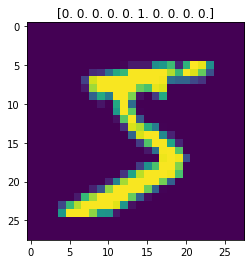

In [ ]:
photo = XTrain[0].reshape(28,28)
print(photo.shape)
pl.imshow(photo)
pl.title(YTrain[0])
pl.show()


In [ ]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32,(5,5),input_shape=(28,28,1),padding='valid',activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),input_shape=XTrain.shape,padding='valid',activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#Strategy = tf.distribute.MirroredStrategy()
#with Strategy.scope():
History = model.fit(XTrain,YTrain,epochs=10,batch_size=10,validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 19s 405us/sample - loss: 0.1604 - acc: 0.9505 - val_loss: 0.0695 - val_acc: 0.9774
Epoch 2/10
48000/48000 [==============================] - 18s 365us/sample - loss: 0.0636 - acc: 0.9798 - val_loss: 0.0433 - val_acc: 0.9855
Epoch 3/10
48000/48000 [==============================] - 17s 354us/sample - loss: 0.0488 - acc: 0.9853 - val_loss: 0.0394 - val_acc: 0.9874
Epoch 4/10
48000/48000 [==============================] - 17s 358us/sample - loss: 0.0405 - acc: 0.9869 - val_loss: 0.0322 - val_acc: 0.9904
Epoch 5/10
48000/48000 [==============================] - 17s 363us/sample - loss: 0.0360 - acc: 0.9893 - val_loss: 0.0365 - val_acc: 0.9893
Epoch 6/10
48000/48000 [==============================] - 17s 360us/sample - loss: 0.0330 - acc: 0.9902 - val_loss: 0.0397 - val_acc: 0.9888
Epoch 7/10

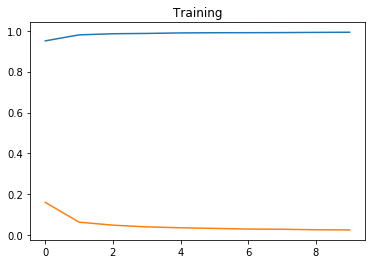

In [ ]:
pl.plot(History.history['acc'])
pl.plot(History.history['loss'])
pl.title('Training')
pl.show()

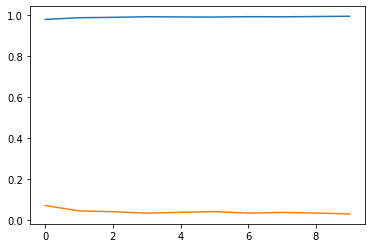

In [ ]:
pl.plot(History.history['val_acc'])
pl.plot(History.history['val_loss'])
pl.show()

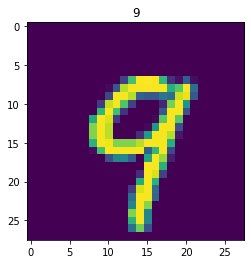

In [ ]:
pl.imshow(XTest[12].reshape(28,28))
pl.title(np.argmax(YTest[12]))
pl.show()

[9]
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 8.2314014e-05
  2.9802322e-08 0.0000000e+00 0.0000000e+00 1.4234153e-06 9.7630227e-01]]


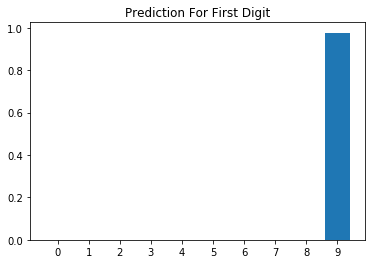

In [ ]:
print(model.predict_classes([[XTest[12]]]))
print(model.predict([[XTest[12]]]))



pl.bar([a for a in range(10)],model.predict([[XTest[12]]])[0])
pl.title('Prediction For First Digit')
pl.xticks([a for a in range(10)])
pl.show()
